# Formatting data

In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(loomR))
suppressMessages(library(SeuratDisk))
suppressMessages(library(PISCES))

In [3]:
# Read in the R object
dat <- readRDS("../../../data/mouse_adrenal/auxiliary_data/snrna/adrenal_Parse_10x_integrated.rds")

In [4]:
head(dat[[]])

,orig.ident,nCount_RNA,nFeature_RNA,cellID,doublet_scores,doublets,library_accession,technology,species,tissue,⋯,Myeloid_membership_score,Sox10._membership_score,Fibroblast_membership_score,Medulla_membership_score,Stromal_membership_score,Smooth_muscle_membership_score,Capsule_membership_score,Hepatocyte_membership_score,Myonuclei_membership_score,gen_celltype_membership_score
,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACAGCCAATATACC.ENCLB069PRB,SeuratProject,5747,2731,AAACAGCCAATATACC.ENCLB069PRB,0.09895227,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,5.011310,3.549678,10.335827,11.43205,7.882373,0.8004176,1.426831,4.471898,1.131025,1.131025
AAACAGCCATGGCCCA.ENCLB069PRB,SeuratProject,4290,2376,AAACAGCCATGGCCCA.ENCLB069PRB,0.06472197,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,8.111888,3.449883,11.771562,10.72261,11.561772,1.4452214,2.587413,7.202797,1.398601,1.398601
AAACATGCAAAGCTCC.ENCLB069PRB,SeuratProject,14701,4981,AAACATGCAAAGCTCC.ENCLB069PRB,0.04960000,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,5.945174,3.394327,9.904088,10.29182,7.679750,0.8434800,1.754983,5.781920,1.054350,1.054350
AAACATGCAACTAGGG.ENCLB069PRB,SeuratProject,3551,1904,AAACATGCAACTAGGG.ENCLB069PRB,0.04400607,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,5.941988,3.858068,11.095466,10.56041,6.983948,0.8448324,1.154604,7.856942,2.224725,2.224725
AAACATGCAGCAATAA.ENCLB069PRB,SeuratProject,2531,1429,AAACATGCAGCAATAA.ENCLB069PRB,0.10545455,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,21.493481,4.385618,11.853023,12.84077,10.430660,1.0272620,2.647175,7.072303,2.252074,2.252074
AAACCAACAACAGCCT.ENCLB069PRB,SeuratProject,8580,3782,AAACCAACAACAGCCT.ENCLB069PRB,0.17894737,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,6.561772,6.363636,8.916084,10.62937,8.811189,1.3170163,2.074592,7.494172,1.258741,1.258741


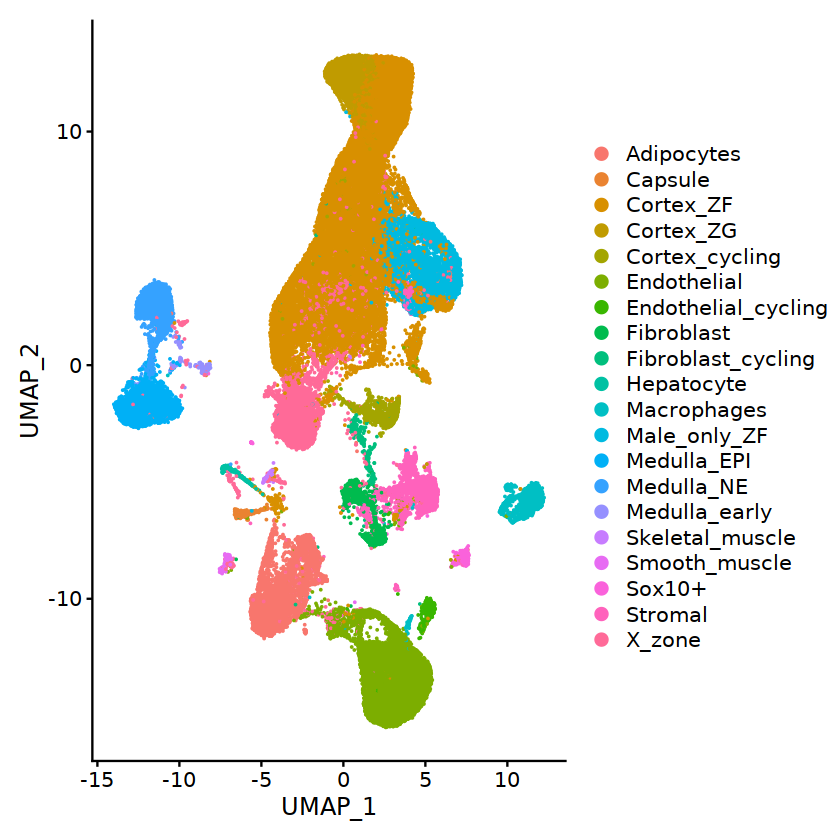

In [5]:
DimPlot(dat, reduction="umap")

# File conversions

In [6]:
names(dat)

[1] "RNA"            "SCT"            "integrated"     "integrated_nn" 
[5] "integrated_snn" "pca"            "umap"

In [36]:
# All cells for unsupervised
mat.name <- paste0('../../../data/processed/mouse_adrenal/processed/snrna', 'adrenal_Parse_10x_integrated_RNA.tsv')
sct.mat <- dat@assays$SCT@scale.data
ARACNeTable(sct.mat, mat.name, subset = FALSE)

An object of class Seurat 
82892 features across 79209 samples within 3 assays 
Active assay: RNA (47721 features, 0 variable features)
 2 other assays present: SCT, integrated
 2 dimensional reductions calculated: pca, umap

In [37]:
rna_dat <- DietSeurat(dat, assays=c("RNA"))

In [38]:
rna_dat

An object of class Seurat 
47721 features across 79209 samples within 1 assay 
Active assay: RNA (47721 features, 0 variable features)

In [39]:
names(rna_dat)

[1] "RNA"

In [41]:
SaveH5Seurat(rna_dat, filename = "../../data/mouse_adrenal/preprocessed/snrna/adrenal_Parse_10x_integrated_RNA.h5Seurat")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA



In [42]:
Convert("../../data/mouse_adrenal/preprocessed/snrna/adrenal_Parse_10x_integrated_RNA.h5Seurat", dest = "h5ad")

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



In [ ]:
loom.file <- as.loom(rna_dat, filename = "../../data/mouse_adrenal/preprocessed/snrna/adrenal_Parse_10x_integrated.loom", verbose = TRUE)
loom.file$close_all()

Saving data from RNA as /matrix

